In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
data_path = "./data/"
file_name_list = os.listdir(data_path)
csv_name_list = [file for file in file_name_list if file.endswith(".csv")]
print(len(csv_name_list))
print(csv_name_list)

4
['calendar.csv', 'sell_prices.csv', 'sales_train_validation.csv', 'sample_submission.csv']


In [3]:
cal = pd.read_csv(data_path+csv_name_list[0])
price = pd.read_csv(data_path+csv_name_list[1])
main = pd.read_csv(data_path+csv_name_list[2])
print(cal.shape)
print(price.shape)
print(main.shape)

(1969, 14)
(6841121, 4)
(30490, 1919)


Category 1

In [4]:
print(main.cat_id.unique())

['HOBBIES' 'HOUSEHOLD' 'FOODS']


# Hobbies

In [5]:
hobby = main[main.cat_id=="HOBBIES"]
print(hobby.shape)
print("Num / Total  =  {}".format(float(len(hobby))/float(len(main))))
hobby.head()

(5650, 1919)
Num / Total  =  0.18530665792062972


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


Use Sum of count by day

In [6]:
hobbies_sales_count_sum = hobby[hobby.columns[6:]].sum(axis=0)

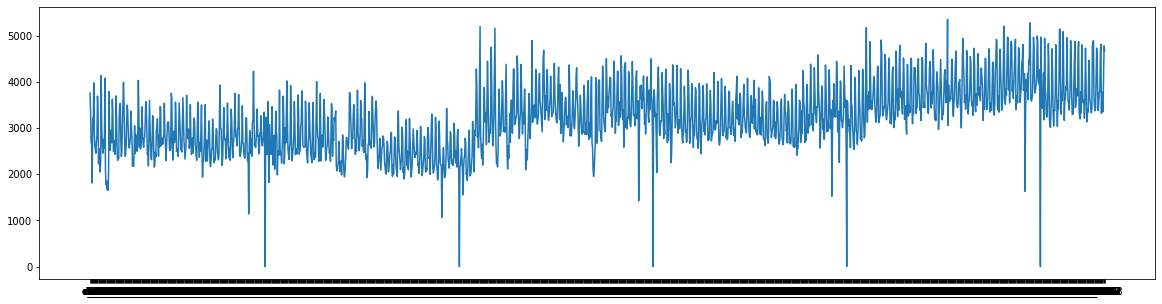

In [7]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(hobbies_sales_count_sum)
plt.show()

## Trend

In [8]:
from sklearn.linear_model import LinearRegression
trend_line = LinearRegression()
y = hobbies_sales_count_sum.values.reshape(-1,1)
x = np.arange(len(y)).reshape(-1,1)
trend_line.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

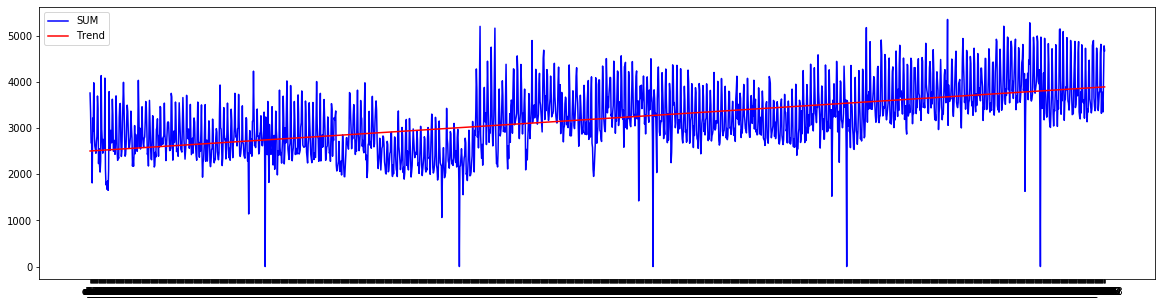

In [9]:
trend = trend_line.predict(x)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(hobbies_sales_count_sum, color='b', label="SUM")
ax.plot(trend, color='r', label="Trend")
ax.legend()
plt.show()

In [10]:
print(trend_line.coef_)
print(trend_line.intercept_)

[[0.72721691]]
[2506.45339674]


Remove trend is~~~

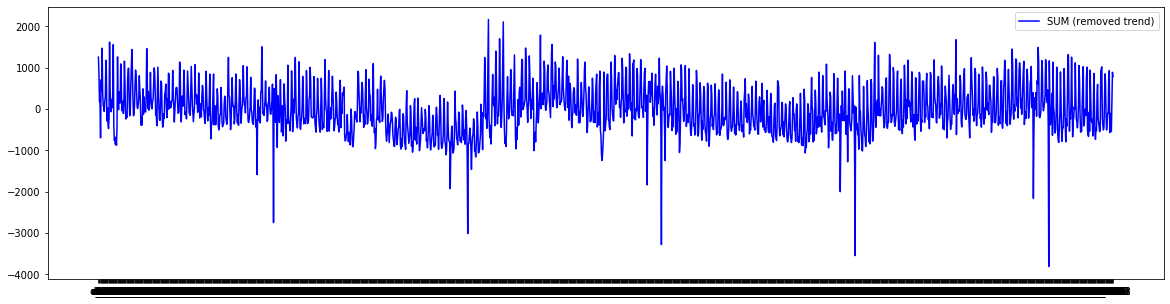

In [11]:
remove_trend = hobbies_sales_count_sum-trend.reshape(-1)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(remove_trend, color='b', label="SUM (removed trend)")
ax.legend()
plt.show()

# Seasonal

term reduction (for detail)

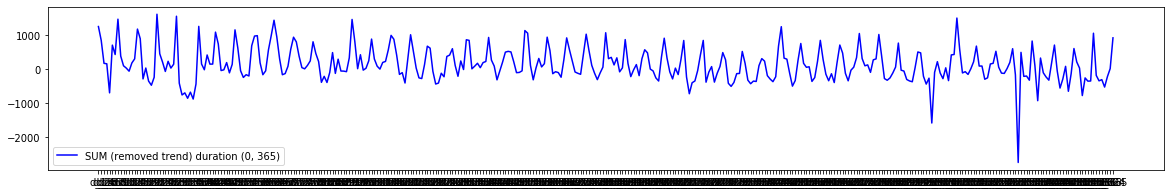

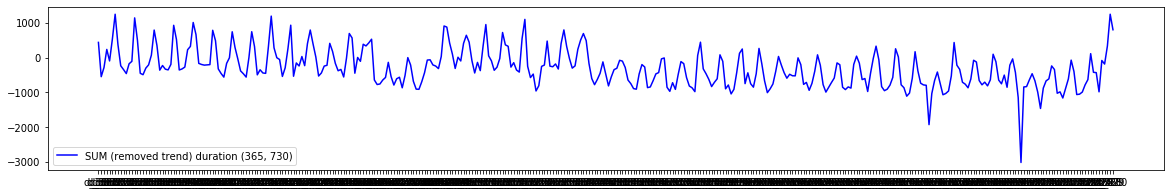

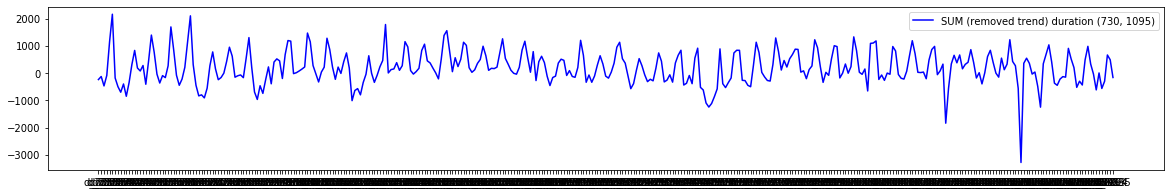

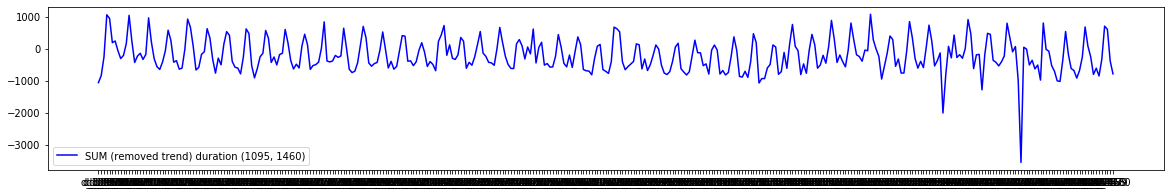

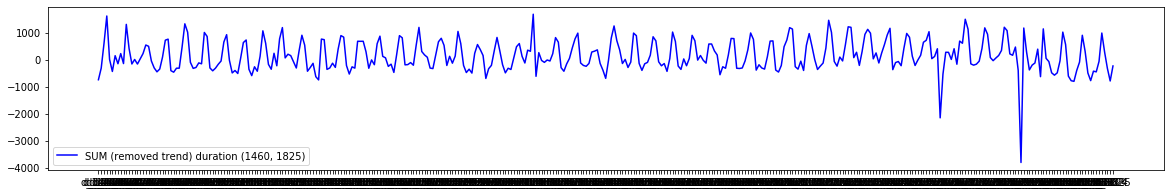

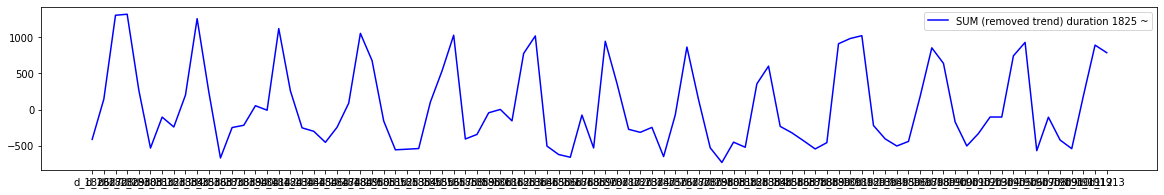

Last term is ====== 88


In [12]:
ax_num = len(remove_trend)//365
for ax_idx in range(ax_num):
    fig = plt.figure(figsize=(20,3))
    ax = fig.add_subplot(1,1,1)
    ax.plot(remove_trend[ax_idx*365:(ax_idx+1)*365], color='b', label="SUM (removed trend) duration {}".format((ax_idx*365,(ax_idx+1)*365)))
    ax.legend()
    plt.show()
    
fig = plt.figure(figsize=(20,3))
ax = fig.add_subplot(1,1,1)
ax.plot(remove_trend[ax_num*365:], color='b', label="SUM (removed trend) duration {} ~".format(ax_num*365))
ax.legend()
plt.show()
print("Last term is ====== {}".format(len(remove_trend)-1825))

In [13]:
def return_rolling_mean_array(arr, dur=7):
    result_list=[]
    for arr_idx in range(len(arr)):
        if arr_idx>=dur:
            result_list.append(arr[arr_idx-dur:arr_idx].mean())
    return np.array(result_list, dtype=np.float32)

5 days rolling mean

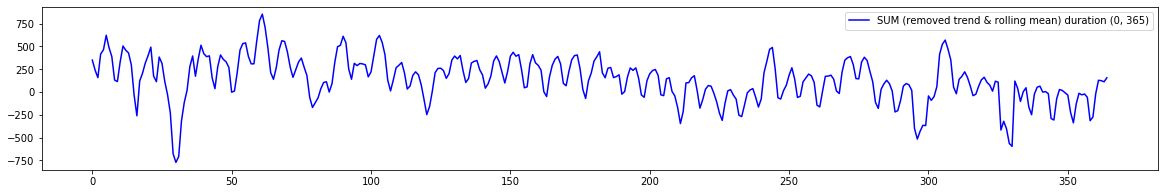

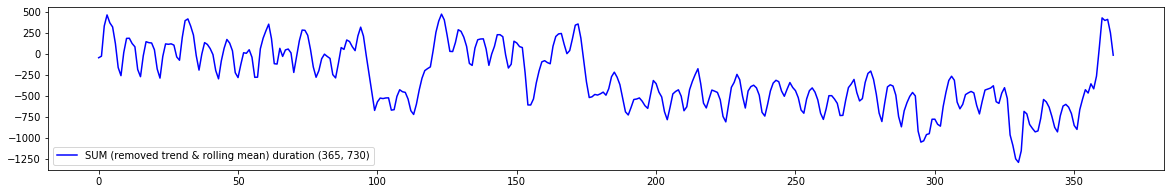

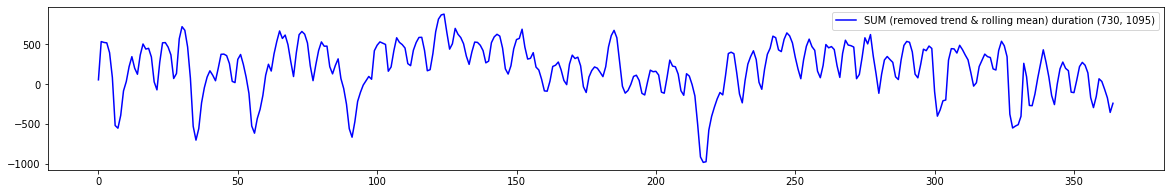

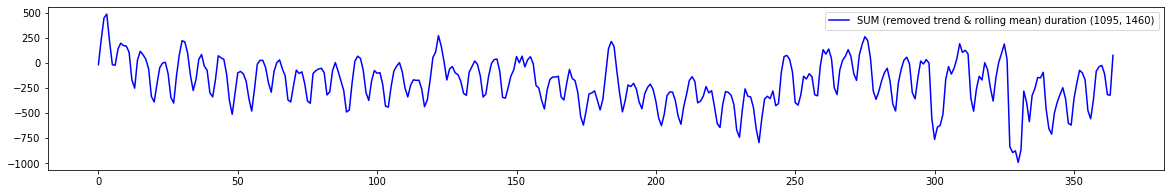

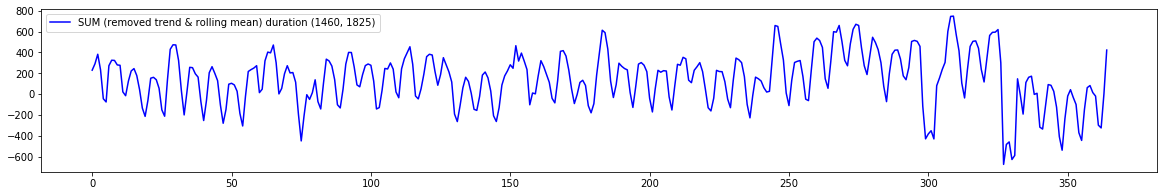

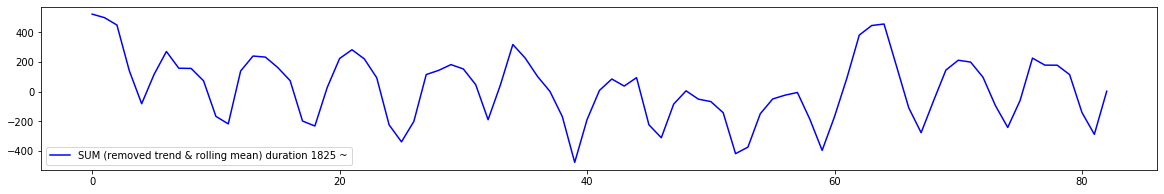

Last duration is ====== 83


In [14]:
rolling_mean5 = return_rolling_mean_array(arr=remove_trend, dur=5)
ax_num = len(rolling_mean5)//365
for ax_idx in range(ax_num):
    fig = plt.figure(figsize=(20,3))
    ax = fig.add_subplot(1,1,1)
    ax.plot(rolling_mean5[ax_idx*365:(ax_idx+1)*365], color='b', label="SUM (removed trend & rolling mean) duration {}".format((ax_idx*365,(ax_idx+1)*365)))
    ax.legend()
    plt.show()
    
fig = plt.figure(figsize=(20,3))
ax = fig.add_subplot(1,1,1)
ax.plot(rolling_mean5[ax_num*365:], color='b', label="SUM (removed trend & rolling mean) duration {} ~".format(ax_num*365))
ax.legend()
plt.show()
print("Last duration is ====== {}".format(len(rolling_mean5)-1825))

7 days rolling mean

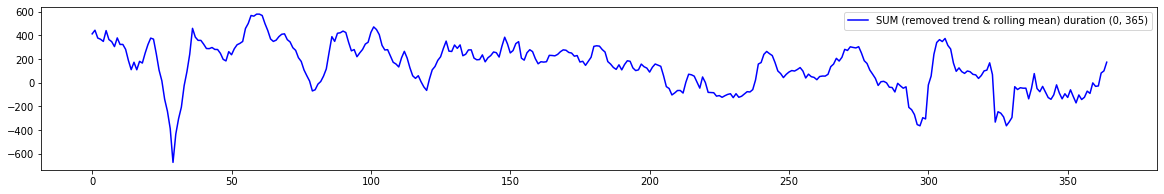

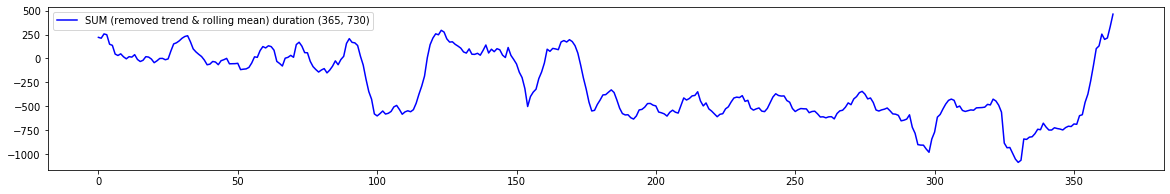

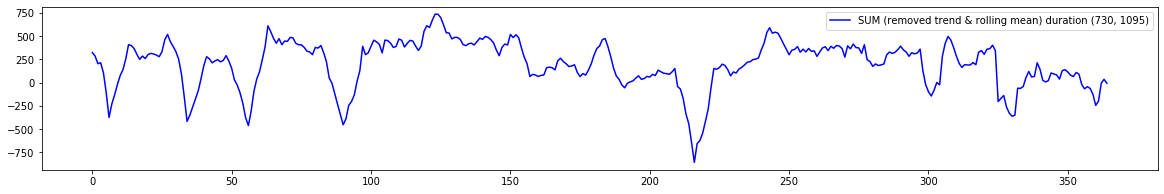

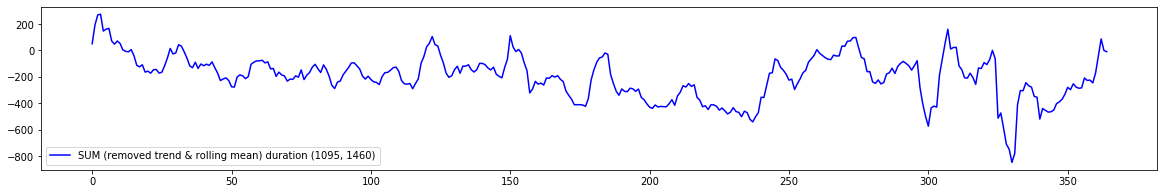

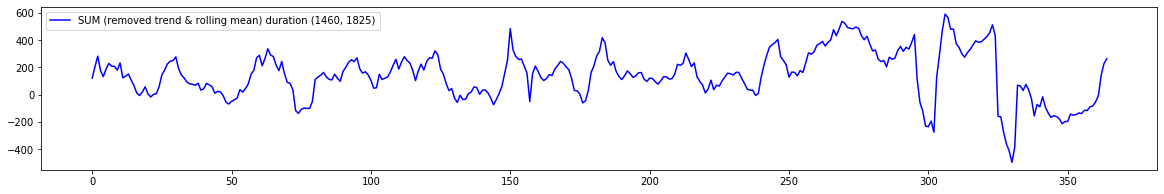

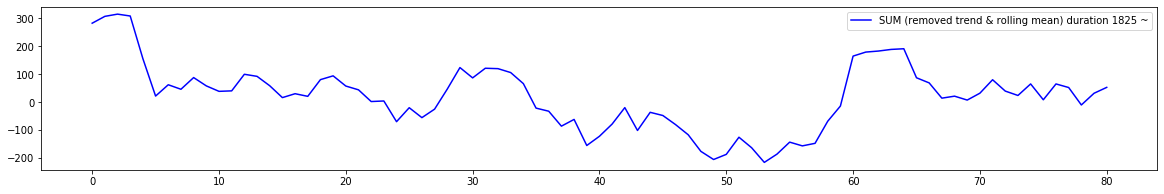

Last duration is ====== 81


In [15]:
rolling_mean7 = return_rolling_mean_array(arr=remove_trend, dur=7)
ax_num = len(rolling_mean7)//365
for ax_idx in range(ax_num):
    fig = plt.figure(figsize=(20,3))
    ax = fig.add_subplot(1,1,1)
    ax.plot(rolling_mean7[ax_idx*365:(ax_idx+1)*365], color='b', label="SUM (removed trend & rolling mean) duration {}".format((ax_idx*365,(ax_idx+1)*365)))
    ax.legend()
    plt.show()
    
fig = plt.figure(figsize=(20,3))
ax = fig.add_subplot(1,1,1)
ax.plot(rolling_mean7[ax_num*365:], color='b', label="SUM (removed trend & rolling mean) duration {} ~".format(ax_num*365))
ax.legend()
plt.show()
print("Last duration is ====== {}".format(len(rolling_mean7)-1825))

There's no seasonality (Maybe??....)

Let's look sales counts by weekday

In [16]:
class_1 = []
class_2 = []
class_3 = []
class_4 = []
class_5 = []
class_6 = []
class_7 = []

for att_idx in range(len(remove_trend)):
    if (att_idx%7)==0:
        class_1.append(remove_trend[att_idx])
    elif (att_idx%7)==1:
        class_2.append(remove_trend[att_idx])
    elif (att_idx%7)==2:
        class_3.append(remove_trend[att_idx])
    elif (att_idx%7)==3:
        class_4.append(remove_trend[att_idx])
    elif (att_idx%7)==4:
        class_5.append(remove_trend[att_idx])
    elif (att_idx%7)==5:
        class_6.append(remove_trend[att_idx])
    elif (att_idx%7)==6:
        class_7.append(remove_trend[att_idx])
        
class_1 = np.array(class_1, dtype=np.float32)
class_2 = np.array(class_2, dtype=np.float32)
class_3 = np.array(class_3, dtype=np.float32)
class_4 = np.array(class_4, dtype=np.float32)
class_5 = np.array(class_5, dtype=np.float32)
class_6 = np.array(class_6, dtype=np.float32)
class_7 = np.array(class_7, dtype=np.float32)

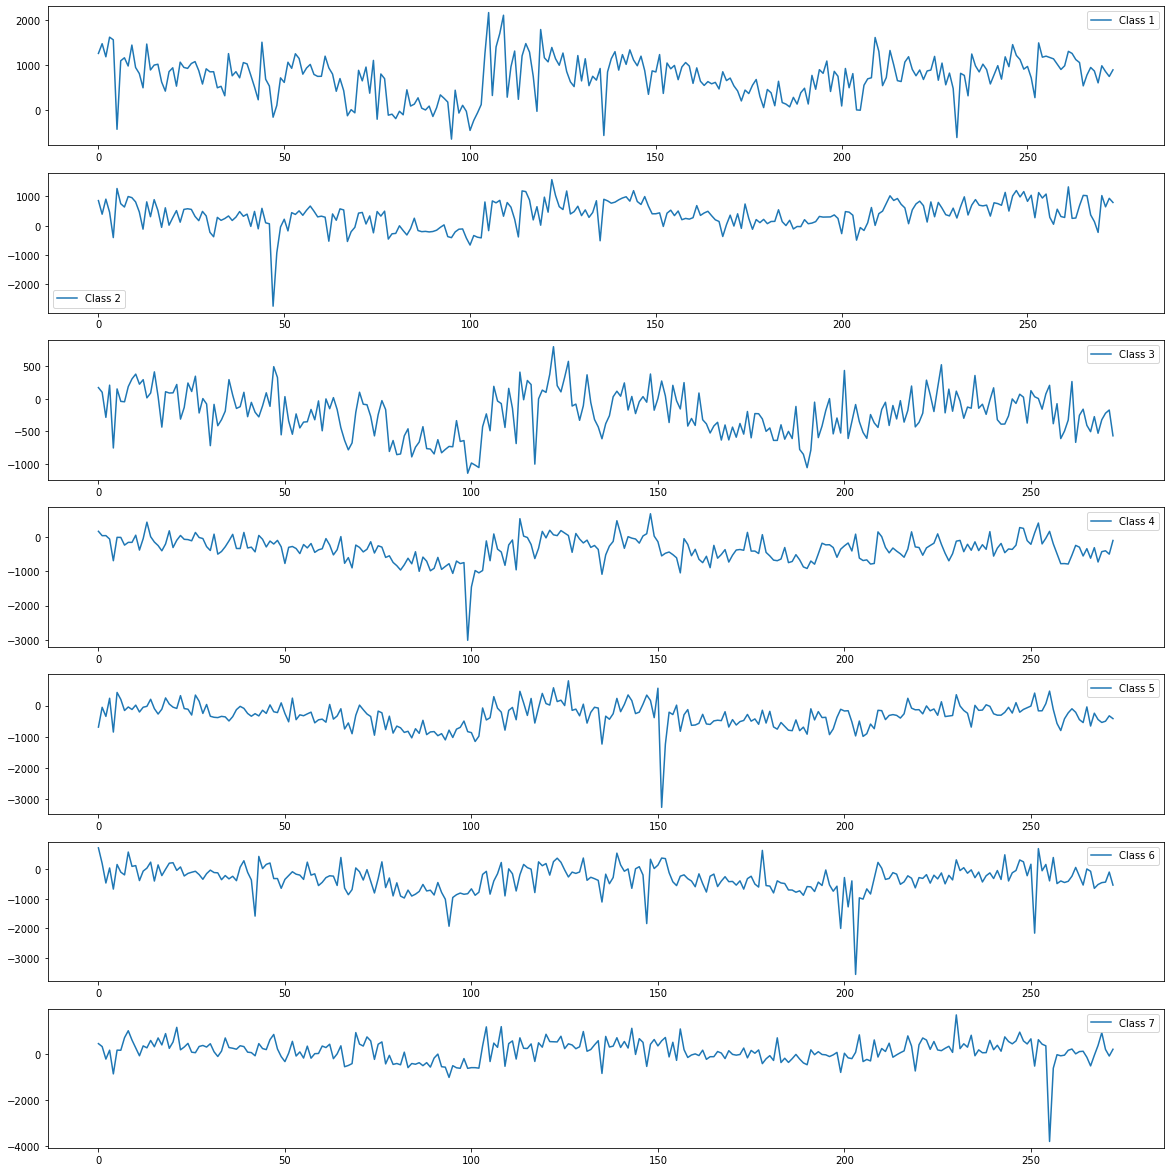

In [17]:
fig = plt.figure(figsize=(20,21))
ax1 = fig.add_subplot(7,1,1)
ax2 = fig.add_subplot(7,1,2)
ax3 = fig.add_subplot(7,1,3)
ax4 = fig.add_subplot(7,1,4)
ax5 = fig.add_subplot(7,1,5)
ax6 = fig.add_subplot(7,1,6)
ax7 = fig.add_subplot(7,1,7)

ax1.plot(class_1, label="Class 1")
ax2.plot(class_2, label="Class 2")
ax3.plot(class_3, label="Class 3")
ax4.plot(class_4, label="Class 4")
ax5.plot(class_5, label="Class 5")
ax6.plot(class_6, label="Class 6")
ax7.plot(class_7, label="Class 7")

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()

plt.show()

Remove seasonality(In this, seasonal attribute is mean of sum counts by weekday)

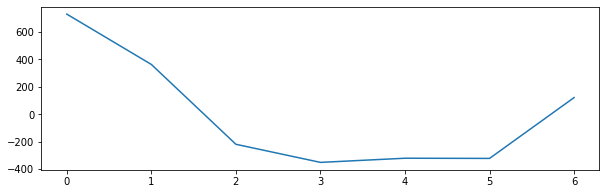

In [18]:
class_1_mean = class_1.mean()
class_2_mean = class_2.mean()
class_3_mean = class_3.mean()
class_4_mean = class_4.mean()
class_5_mean = class_5.mean()
class_6_mean = class_6.mean()
class_7_mean = class_7.mean()

fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1,1,1)
ax.plot((class_1_mean,class_2_mean,class_3_mean,class_4_mean,class_5_mean,class_6_mean,class_7_mean))
plt.show()

de_seasonal_att = []
for att_idx in range(len(remove_trend)):
    if (att_idx%7)==0:
        de_seasonal_att.append(class_1_mean)
    elif (att_idx%7)==1:
        de_seasonal_att.append(class_2_mean)
    elif (att_idx%7)==2:
        de_seasonal_att.append(class_3_mean)
    elif (att_idx%7)==3:
        de_seasonal_att.append(class_4_mean)
    elif (att_idx%7)==4:
        de_seasonal_att.append(class_5_mean)
    elif (att_idx%7)==5:
        de_seasonal_att.append(class_6_mean)
    elif (att_idx%7)==6:
        de_seasonal_att.append(class_7_mean)
        
de_seasonal_att = np.array(de_seasonal_att, dtype=np.float32)

de_sseasonal_trend_arr = remove_trend - de_seasonal_att

### Final Att array

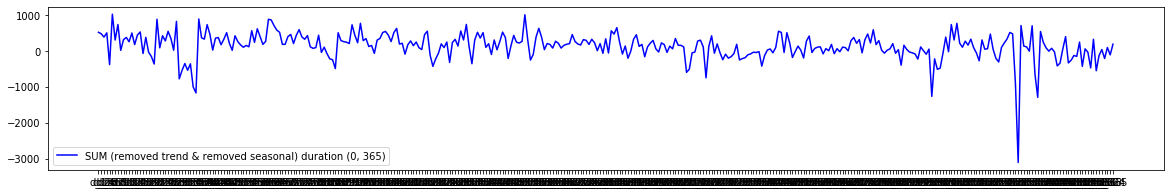

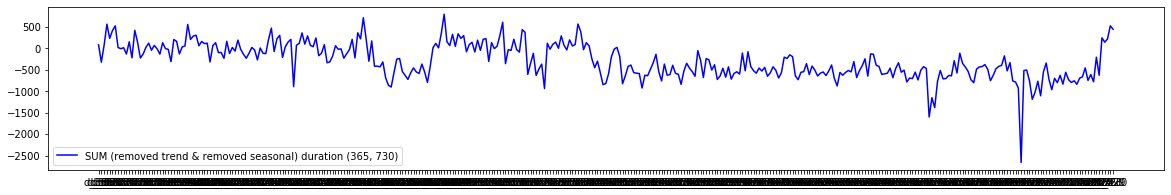

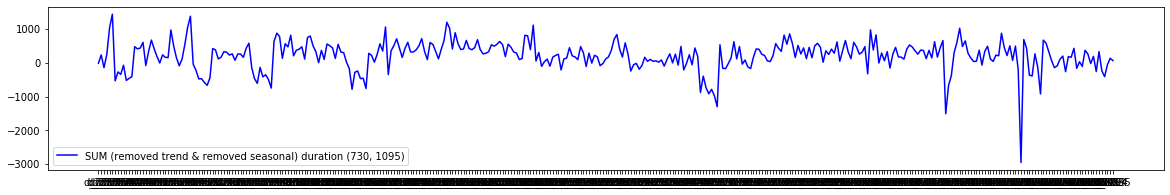

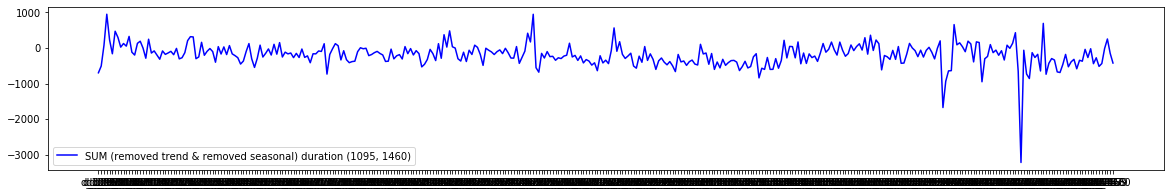

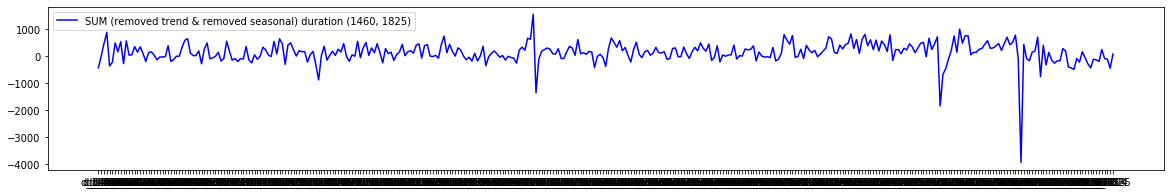

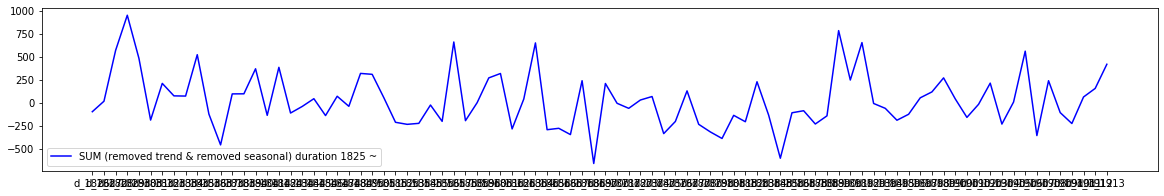

Last duration is ====== 88


In [19]:
ax_num = len(de_sseasonal_trend_arr)//365
for ax_idx in range(ax_num):
    fig = plt.figure(figsize=(20,3))
    ax = fig.add_subplot(1,1,1)
    ax.plot(de_sseasonal_trend_arr[ax_idx*365:(ax_idx+1)*365], color='b', label="SUM (removed trend & removed seasonal) duration {}".format((ax_idx*365,(ax_idx+1)*365)))
    ax.legend()
    plt.show()
    
fig = plt.figure(figsize=(20,3))
ax = fig.add_subplot(1,1,1)
ax.plot(de_sseasonal_trend_arr[ax_num*365:], color='b', label="SUM (removed trend & removed seasonal) duration {} ~".format(ax_num*365))
ax.legend()
plt.show()
print("Last duration is ====== {}".format(len(de_sseasonal_trend_arr)-1825))

there's no seasonality, also trend...?

except one day (? one day in winter?)

## Make Data set (For input data

In [20]:
from collections import deque
import tensorflow as tf

## Split

In [21]:
len(hobbies_sales_count_sum)//7

273

Maybe one day that sum of counts is 0 is Outlier

1. Remove?
2. Replace?

In this, Using Replace.(Use mean)

In [22]:
hobbies_sales_count_sum = np.where(hobbies_sales_count_sum==0, hobbies_sales_count_sum.mean(), hobbies_sales_count_sum)

In [23]:
train = hobbies_sales_count_sum[:7*240]
test = hobbies_sales_count_sum[7*240:]

#### Make calendar, price data set

In [24]:
def return_cat1(raw):
    return raw.split("_")[0]

price["cat1"] = price["item_id"].apply(return_cat1)
price.head()

,store_id,item_id,wm_yr_wk,sell_price,cat1
0,CA_1,HOBBIES_1_001,11325,9.58,HOBBIES
1,CA_1,HOBBIES_1_001,11326,9.58,HOBBIES
2,CA_1,HOBBIES_1_001,11327,8.26,HOBBIES
3,CA_1,HOBBIES_1_001,11328,8.26,HOBBIES
4,CA_1,HOBBIES_1_001,11329,8.26,HOBBIES


In [25]:
hobbies_price = price[price.cat1=="HOBBIES"][["wm_yr_wk","sell_price"]]
hobbies_price_mean = hobbies_price.groupby(["wm_yr_wk"]).mean()

In [26]:
hobbies_price_mean

,sell_price
wm_yr_wk,
11101,4.671317
11102,4.676858
11103,4.620156
11104,4.593673
11105,4.585030
...,...
11617,5.536804
11618,5.536402
11619,5.536085


In [27]:
def return_event_type_sport(raw):
    if raw=="Sporting":
        return 1
    else :
        return 0

def return_event_type_cultural(raw):
    if raw=="Cultural":
        return 1
    else :
        return 0

def return_event_type_national(raw):
    if raw=="National":
        return 1
    else :
        return 0
    
def return_event_type_religious(raw):
    if raw=="Religious":
        return 1
    else :
        return 0
cal["sport"] = cal['event_type_1'].apply(return_event_type_sport)
cal["cultural"] = cal['event_type_1'].apply(return_event_type_cultural)
cal["national"] = cal['event_type_1'].apply(return_event_type_national)
cal["religious"] = cal['event_type_1'].apply(return_event_type_religious)

In [28]:
cal_price_merge = pd.merge(cal, hobbies_price_mean, how="left", left_on="wm_yr_wk", right_index=True)
cal_price_merge_need = cal_price_merge[["d","snap_CA","snap_TX","snap_WI","sport","cultural","national","religious","sell_price"]]
cal_price_merge_need

,d,snap_CA,snap_TX,snap_WI,sport,cultural,national,religious,sell_price
0,d_1,0,0,0,0,0,0,0,4.671317
1,d_2,0,0,0,0,0,0,0,4.671317
2,d_3,0,0,0,0,0,0,0,4.671317
3,d_4,1,1,0,0,0,0,0,4.671317
4,d_5,1,0,1,0,0,0,0,4.671317
...,...,...,...,...,...,...,...,...,...
1964,d_1965,0,1,1,0,0,0,0,5.535586
1965,d_1966,0,0,0,0,0,0,0,5.535586
1966,d_1967,0,0,0,0,0,0,0,5.535586
1967,d_1968,0,0,0,0,0,0,0,5.535646


### remove trand & seasonal

In [33]:
from sklearn.linear_model import LinearRegression
trend_line = LinearRegression()
y = train.reshape(-1,1)
x = np.arange(len(train)).reshape(-1,1)
trend_line.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print(trend_line.coef_)
print(trend_line.intercept_)

[[0.6669107]]
[2548.69435639]


In [35]:
remove_trend_train = train-trend_line.predict(np.arange(len(train)).reshape(-1,1)).reshape(-1)
remove_trend_test = test-trend_line.predict(np.arange(len(test)).reshape(-1,1)).reshape(-1)

class_1 = []
class_2 = []
class_3 = []
class_4 = []
class_5 = []
class_6 = []
class_7 = []

for att_idx in range(len(remove_trend_train)):
    if (att_idx%7)==0:
        class_1.append(remove_trend_train[att_idx])
    elif (att_idx%7)==1:
        class_2.append(remove_trend_train[att_idx])
    elif (att_idx%7)==2:
        class_3.append(remove_trend_train[att_idx])
    elif (att_idx%7)==3:
        class_4.append(remove_trend_train[att_idx])
    elif (att_idx%7)==4:
        class_5.append(remove_trend_train[att_idx])
    elif (att_idx%7)==5:
        class_6.append(remove_trend_train[att_idx])
    elif (att_idx%7)==6:
        class_7.append(remove_trend_train[att_idx])
        
class_1 = np.array(class_1, dtype=np.float32)
class_2 = np.array(class_2, dtype=np.float32)
class_3 = np.array(class_3, dtype=np.float32)
class_4 = np.array(class_4, dtype=np.float32)
class_5 = np.array(class_5, dtype=np.float32)
class_6 = np.array(class_6, dtype=np.float32)
class_7 = np.array(class_7, dtype=np.float32)

class_1_mean = class_1.mean()
class_2_mean = class_2.mean()
class_3_mean = class_3.mean()
class_4_mean = class_4.mean()
class_5_mean = class_5.mean()
class_6_mean = class_6.mean()
class_7_mean = class_7.mean()

de_seasonal_att = []
for att_idx in range(len(remove_trend_train)):
    if (att_idx%7)==0:
        de_seasonal_att.append(class_1_mean)
    elif (att_idx%7)==1:
        de_seasonal_att.append(class_2_mean)
    elif (att_idx%7)==2:
        de_seasonal_att.append(class_3_mean)
    elif (att_idx%7)==3:
        de_seasonal_att.append(class_4_mean)
    elif (att_idx%7)==4:
        de_seasonal_att.append(class_5_mean)
    elif (att_idx%7)==5:
        de_seasonal_att.append(class_6_mean)
    elif (att_idx%7)==6:
        de_seasonal_att.append(class_7_mean)

de_seasonal_att = np.array(de_seasonal_att, dtype=np.float32)

remove_trend_seasonal_train = remove_trend_train - de_seasonal_att

de_seasonal_att2 = []
for att_idx in range(len(remove_trend_test)):
    if (att_idx%7)==0:
        de_seasonal_att2.append(class_1_mean)
    elif (att_idx%7)==1:
        de_seasonal_att2.append(class_2_mean)
    elif (att_idx%7)==2:
        de_seasonal_att2.append(class_3_mean)
    elif (att_idx%7)==3:
        de_seasonal_att2.append(class_4_mean)
    elif (att_idx%7)==4:
        de_seasonal_att2.append(class_5_mean)
    elif (att_idx%7)==5:
        de_seasonal_att2.append(class_6_mean)
    elif (att_idx%7)==6:
        de_seasonal_att2.append(class_7_mean)
        
de_seasonal_att2 = np.array(de_seasonal_att2, dtype=np.float32)

remove_trend_seasonal_test = remove_trend_test - de_seasonal_att2

In [36]:
print(remove_trend_seasonal_train.shape, remove_trend_seasonal_test.shape)

(1680,) (233,)


In [37]:
remove_trend_seasonal_train

array([511.46244292, 470.08883667, 344.76660676, ..., 342.8930763 ,
       242.21389754, 500.60837295])

In [38]:
remove_trend_seasonal_test

array([1051.46244292, 1164.08883667, 1562.76660676,  954.87632265,
       1224.6346744 , 1173.95549563, 1215.34997104, 1258.79406804,
       1618.42046178, 1071.09823187, 1187.20794776, 1179.96629951,
       1443.28712075, 1407.68159616, 1461.12569315, 1590.75208689,
       1003.42985698, 1324.53957287, 1180.29792462, 1143.61874586,
       1151.01322127, 1160.45731826, 1534.08371201, 1005.76148209,
       1055.87119798, 1272.62954974, 1972.95037097, 1773.34484638,
       1658.78894337, 1973.41533712, 1132.09310721, 1164.2028231 ,
       1433.96117485, 1093.28199608, 1572.67647149, 1439.12056849,
       1337.74696223, 1393.42473232, 1152.53444821, 1250.29279996,
       1368.6136212 , 1473.00809661, 1932.4521936 , 1853.07858734,
       1324.75635743, 1275.86607332, 1585.62442507, 1446.94524631,
       1598.33972172, 1691.78381871, 2038.41021246, 1467.08798254,
       1789.19769843, 1277.95605019, 1800.27687142, 1980.67134683,
       1598.11544382, 1820.74183757, 1422.41960766, 1765.52932

In [39]:
cal_price_merge_need_train = cal_price_merge_need[cal_price_merge_need.columns[1:]][:7*240].values
cal_price_merge_need_test = cal_price_merge_need[cal_price_merge_need.columns[1:]][7*240:].values

In [40]:
cal_price_merge_need_train_min = cal_price_merge_need_train.min(axis=0)
cal_price_merge_need_train_max = cal_price_merge_need_train.max(axis=0)
cal_price_merge_need_train_range = (cal_price_merge_need_train_max-cal_price_merge_need_train_min)
cal_price_merge_need_train = (cal_price_merge_need_train-cal_price_merge_need_train_min)/cal_price_merge_need_train_range
cal_price_merge_need_test = (cal_price_merge_need_test-cal_price_merge_need_train_min)/cal_price_merge_need_train_range

In [42]:
from collections import deque
def return_dataset(hist_arr, cal_price, dur):
    dq = deque(maxlen=dur)
    X = []
    Y = []
    for idx in range(len(hist_arr)-1):
        dq.append(hist_arr[idx])
        if len(dq)==dur:
            history_tmp = np.array(dq, dtype=np.float32)
            history_tmp_min = history_tmp.min()
            history_tmp_max = history_tmp.max()
            history_tmp_range = history_tmp_max - history_tmp_min
            history_tmp = (history_tmp-history_tmp_min)/history_tmp_range
            
            cal_price_tmp = np.array(cal_price[idx+1], dtype=np.float32)
            
            concat_tmp = np.concatenate((history_tmp, cal_price_tmp))

            X.append(concat_tmp)
            Y.append(np.array(hist_arr[idx+1], dtype=np.float32))

    X = np.array(X, dtype=np.float32)
    Y = np.array(Y, dtype=np.float32)
    print(X.shape, Y.shape)
    return X, Y

x_train, y_train = return_dataset(hist_arr=remove_trend_seasonal_train, cal_price=cal_price_merge_need_train, dur=28)
x_test, y_test = return_dataset(hist_arr=remove_trend_seasonal_test, cal_price=cal_price_merge_need_test, dur=28)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1652, 36) (1652,)
(205, 36) (205,)
(1652, 36) (1652,) (205, 36) (205,)


In [43]:
y_train_min = y_train.min()
y_train_max = y_train.max()
y_train_range = y_train_max-y_train_min

y_train = (y_train-y_train_min)/y_train_range
y_test = (y_test-y_train_min)/y_train_range
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1652, 36) (1652,) (205, 36) (205,)


In [44]:
import tensorflow as tf
def return_model(dur):
    input_tens = tf.keras.Input(shape=(dur+8))
    x1, x2 = tf.split(input_tens, [dur,8], axis=1)
    x1 = tf.reshape(x1, [-1, dur, 1])
    x2 = tf.reshape(x2, [-1, 8, 1])
    
    x1 = tf.keras.layers.Conv1D(filters=16, kernel_size=7, strides=7, activation='relu')(x1)
    x1 = tf.keras.layers.Conv1D(filters=16, kernel_size=4, padding='same', activation='relu')(x1)
    x1 = tf.keras.layers.Conv1D(filters=8, kernel_size=4, padding='same', activation='relu')(x1)
    x1 = tf.keras.layers.GlobalAveragePooling1D()(x1)
    x1 = tf.keras.layers.Dense(1)(x1)
    
    x2 = tf.keras.layers.Conv1D(filters=8, kernel_size=8, padding='valid', activation='relu')(x2)
    x2 = tf.keras.layers.GlobalAveragePooling1D()(x2)
    x2 = tf.keras.layers.Dense(1)(x2)
    x = x1 + x2
    model = tf.keras.Model(inputs=input_tens, outputs=x)
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(), metrics=["mae"])
    print(model.summary())
    return model

model = return_model(dur=28)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 36)]         0                                            
__________________________________________________________________________________________________
tf_op_layer_split (TensorFlowOp [(None, 28), (None,  0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_Reshape (TensorFlow [(None, 28, 1)]      0           tf_op_layer_split[0][0]          
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 4, 16)        128         tf_op_layer_Reshape[0][0]        
______________________________________________________________________________________________

In [45]:
model.fit(x_train, y_train, epochs=500, batch_size=128, validation_data=(x_test,y_test))

Train on 1652 samples, validate on 205 samples
Epoch 1/500
1652/1652 [==============================] - 0s 296us/sample - loss: 0.4206 - mae: 0.6174 - val_loss: 0.9138 - val_mae: 0.9419
Epoch 2/500
1652/1652 [==============================] - 0s 21us/sample - loss: 0.1507 - mae: 0.3404 - val_loss: 0.3741 - val_mae: 0.5881
Epoch 3/500
1652/1652 [==============================] - 0s 19us/sample - loss: 0.0406 - mae: 0.1588 - val_loss: 0.1537 - val_mae: 0.3549
Epoch 4/500
1652/1652 [==============================] - 0s 20us/sample - loss: 0.0367 - mae: 0.1500 - val_loss: 0.2616 - val_mae: 0.4856
Epoch 5/500
1652/1652 [==============================] - 0s 23us/sample - loss: 0.0312 - mae: 0.1400 - val_loss: 0.2520 - val_mae: 0.4767
Epoch 6/500
1652/1652 [==============================] - 0s 19us/sample - loss: 0.0292 - mae: 0.1346 - val_loss: 0.2216 - val_mae: 0.4448
Epoch 7/500
1652/1652 [==============================] - 0s 21us/sample - loss: 0.0278 - mae: 0.1307 - val_loss: 0.2341 - va

Epoch 118/500
1652/1652 [==============================] - 0s 20us/sample - loss: 0.0114 - mae: 0.0833 - val_loss: 0.1952 - val_mae: 0.4281
Epoch 119/500
1652/1652 [==============================] - 0s 20us/sample - loss: 0.0113 - mae: 0.0830 - val_loss: 0.1897 - val_mae: 0.4218
Epoch 120/500
1652/1652 [==============================] - 0s 20us/sample - loss: 0.0113 - mae: 0.0828 - val_loss: 0.1950 - val_mae: 0.4280
Epoch 121/500
1652/1652 [==============================] - 0s 20us/sample - loss: 0.0113 - mae: 0.0829 - val_loss: 0.1915 - val_mae: 0.4238
Epoch 122/500
1652/1652 [==============================] - 0s 20us/sample - loss: 0.0113 - mae: 0.0829 - val_loss: 0.1922 - val_mae: 0.4245
Epoch 123/500
1652/1652 [==============================] - 0s 20us/sample - loss: 0.0114 - mae: 0.0834 - val_loss: 0.2121 - val_mae: 0.4472
Epoch 124/500
1652/1652 [==============================] - 0s 19us/sample - loss: 0.0113 - mae: 0.0831 - val_loss: 0.1940 - val_mae: 0.4266
Epoch 125/500
1652/1

1652/1652 [==============================] - 0s 20us/sample - loss: 0.0086 - mae: 0.0718 - val_loss: 0.2122 - val_mae: 0.4426
Epoch 235/500
1652/1652 [==============================] - 0s 18us/sample - loss: 0.0084 - mae: 0.0711 - val_loss: 0.2231 - val_mae: 0.4549
Epoch 236/500
1652/1652 [==============================] - 0s 20us/sample - loss: 0.0085 - mae: 0.0718 - val_loss: 0.1918 - val_mae: 0.4191
Epoch 237/500
1652/1652 [==============================] - 0s 19us/sample - loss: 0.0085 - mae: 0.0712 - val_loss: 0.2037 - val_mae: 0.4329
Epoch 238/500
1652/1652 [==============================] - 0s 19us/sample - loss: 0.0084 - mae: 0.0713 - val_loss: 0.2081 - val_mae: 0.4378
Epoch 239/500
1652/1652 [==============================] - 0s 20us/sample - loss: 0.0084 - mae: 0.0711 - val_loss: 0.2167 - val_mae: 0.4475
Epoch 240/500
1652/1652 [==============================] - 0s 23us/sample - loss: 0.0083 - mae: 0.0709 - val_loss: 0.2025 - val_mae: 0.4318
Epoch 241/500
1652/1652 [=========

1652/1652 [==============================] - 0s 20us/sample - loss: 0.0068 - mae: 0.0640 - val_loss: 0.2253 - val_mae: 0.4533
Epoch 351/500
1652/1652 [==============================] - 0s 21us/sample - loss: 0.0066 - mae: 0.0632 - val_loss: 0.2219 - val_mae: 0.4488
Epoch 352/500
1652/1652 [==============================] - 0s 19us/sample - loss: 0.0067 - mae: 0.0636 - val_loss: 0.2033 - val_mae: 0.4279
Epoch 353/500
1652/1652 [==============================] - 0s 20us/sample - loss: 0.0068 - mae: 0.0641 - val_loss: 0.2274 - val_mae: 0.4552
Epoch 354/500
1652/1652 [==============================] - 0s 21us/sample - loss: 0.0067 - mae: 0.0635 - val_loss: 0.2224 - val_mae: 0.4494
Epoch 355/500
1652/1652 [==============================] - 0s 21us/sample - loss: 0.0067 - mae: 0.0640 - val_loss: 0.2124 - val_mae: 0.4387
Epoch 356/500
1652/1652 [==============================] - 0s 20us/sample - loss: 0.0067 - mae: 0.0638 - val_loss: 0.2118 - val_mae: 0.4374
Epoch 357/500
1652/1652 [=========

1652/1652 [==============================] - 0s 22us/sample - loss: 0.0059 - mae: 0.0600 - val_loss: 0.2262 - val_mae: 0.4513
Epoch 467/500
1652/1652 [==============================] - 0s 21us/sample - loss: 0.0056 - mae: 0.0578 - val_loss: 0.2267 - val_mae: 0.4512
Epoch 468/500
1652/1652 [==============================] - 0s 20us/sample - loss: 0.0056 - mae: 0.0580 - val_loss: 0.2071 - val_mae: 0.4291
Epoch 469/500
1652/1652 [==============================] - 0s 20us/sample - loss: 0.0056 - mae: 0.0580 - val_loss: 0.2064 - val_mae: 0.4287
Epoch 470/500
1652/1652 [==============================] - 0s 21us/sample - loss: 0.0057 - mae: 0.0584 - val_loss: 0.2323 - val_mae: 0.4578
Epoch 471/500
1652/1652 [==============================] - 0s 21us/sample - loss: 0.0057 - mae: 0.0586 - val_loss: 0.1971 - val_mae: 0.4177
Epoch 472/500
1652/1652 [==============================] - 0s 20us/sample - loss: 0.0057 - mae: 0.0586 - val_loss: 0.2137 - val_mae: 0.4370
Epoch 473/500
1652/1652 [=========

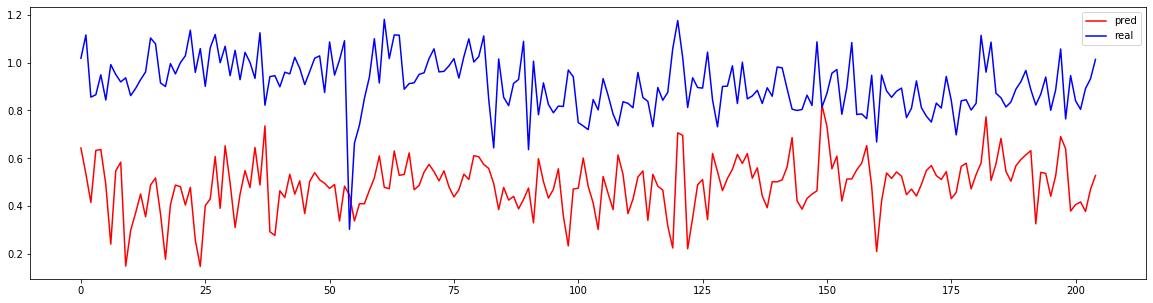

In [46]:
test_pred = model.predict(x_test)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(test_pred, color='r', label='pred')
ax.plot(y_test, color='b', label='real')
ax.legend()
plt.show()

### Compare with origin data

In [47]:
print(trend_line.coef_)
print(trend_line.intercept_)

[[0.6669107]]
[2548.69435639]


In [48]:
len(hobbies_sales_count_sum)

1913

# In Test (Return to origin)(Add seasonality, Trend)

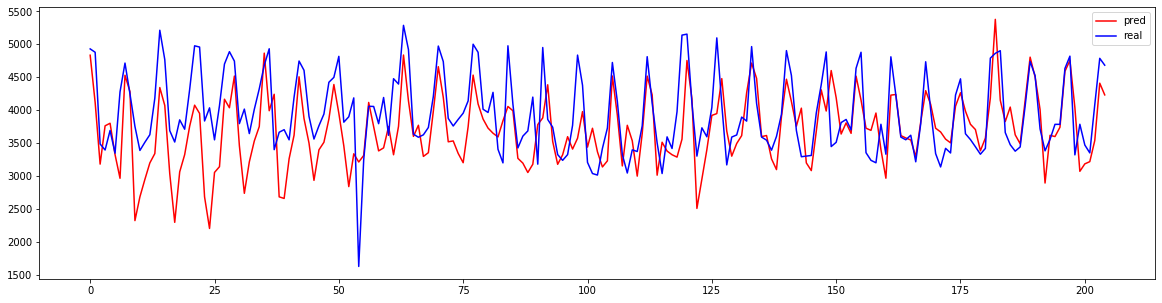

In [49]:
no_trend_seasonal = test_pred.reshape(-1)*y_train_range + y_train_min
tmp_att = de_seasonal_att2[-len(x_test):]
no_trend = no_trend_seasonal + tmp_att
trend_att = trend_line.predict(np.arange(len(hobbies_sales_count_sum))[-len(x_test):].reshape(-1,1)).reshape(-1)
origin_data = no_trend+trend_att

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(origin_data, color='r', label='pred')
ax.plot(hobbies_sales_count_sum[-len(no_trend_seasonal):], color='b', label='real')
ax.legend()
plt.show()

### Train

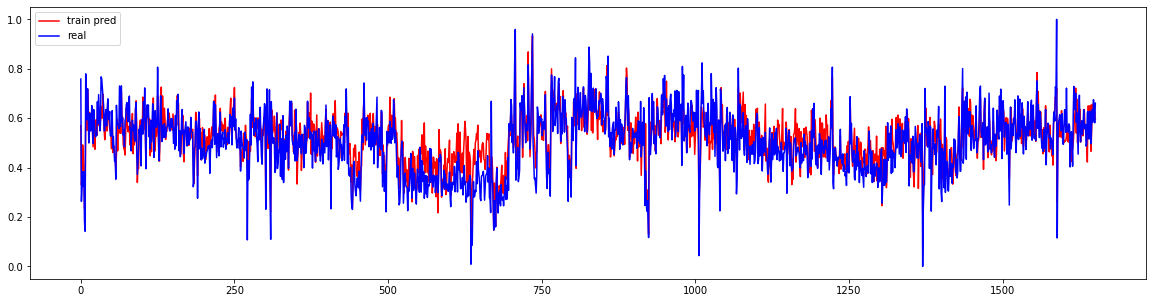

In [50]:
train_pred = model.predict(x_train)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(train_pred, color='r', label='train pred')
ax.plot(y_train, color='b', label='real')
ax.legend()
plt.show()

# In Train (Return to origin)(Add seasonality, Trend)

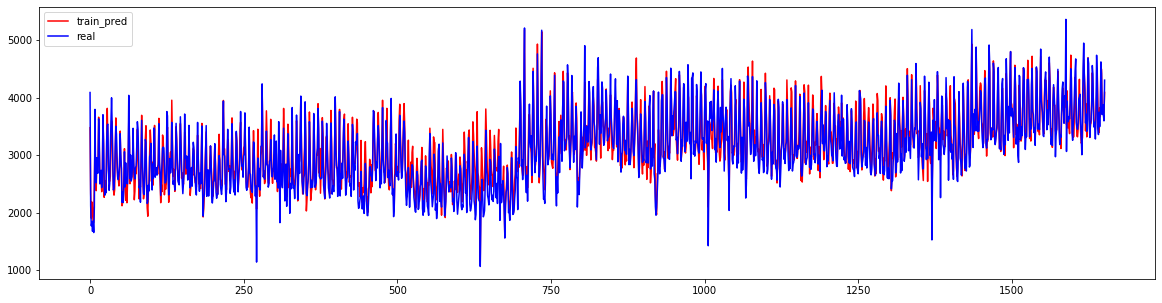

In [51]:
no_trend_seasonal_train = train_pred.reshape(-1)*y_train_range + y_train_min
seasonal_att = de_seasonal_att[-len(x_train):]
no_trend_train = no_trend_seasonal_train + seasonal_att
trend_att = trend_line.predict(np.arange(len(train))[-len(x_train):].reshape(-1,1)).reshape(-1)
origin_data_train = no_trend_train+trend_att

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(origin_data_train, color='r', label='train_pred')
ax.plot(train[-len(x_train):], color='b', label='real')
ax.legend()
plt.show()